In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [3]:
train= pd.read_csv("domaci1_data/train.csv")
test= pd.read_csv("domaci1_data/test.csv")
real= pd.read_csv("domaci1_data/sample_submission.csv")

In [6]:
plt.style.use(style="ggplot")
plt.rcParams['figure.figsize']=(10,6)

In [7]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew  1.8828757597682129


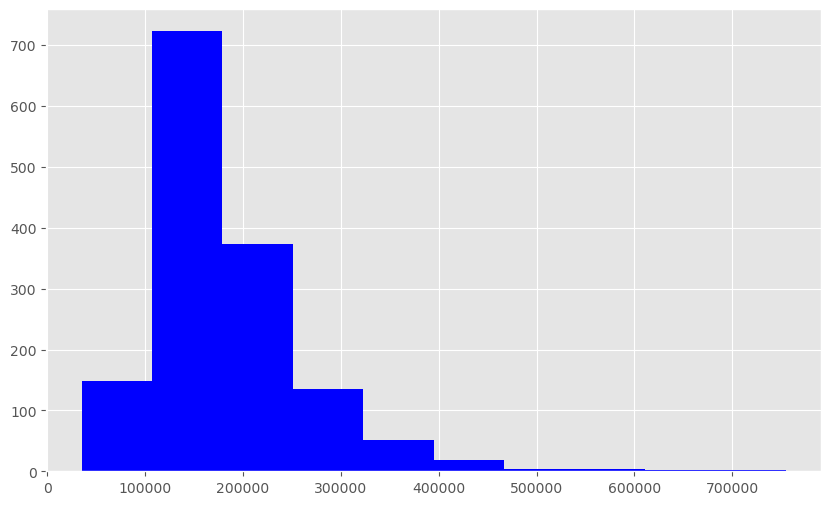

In [11]:
print("Skew ",train.SalePrice.skew())
plt.hist(train.SalePrice, color="blue")
plt.show()

Skew:  0.12133506220520406


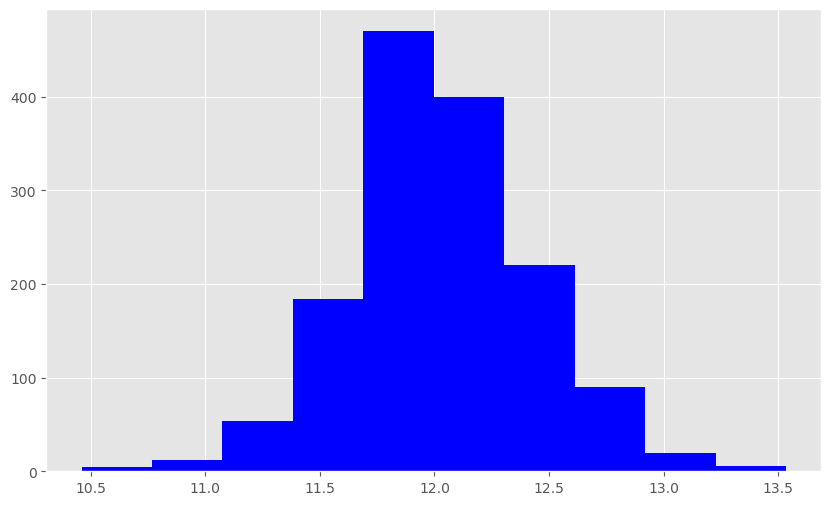

In [14]:
# logaritmovanje funkcije kako bi bila bolji gaus radi linearnosti
target=np.log(train.SalePrice)
print("Skew: ", target.skew())
plt.hist(target, color="blue")
plt.show()

In [19]:
numeric_features= train.select_dtypes(include=[np.number])
corr= numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5], "\n")
print(corr['SalePrice'].sort_values(ascending=False)[-5:])


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


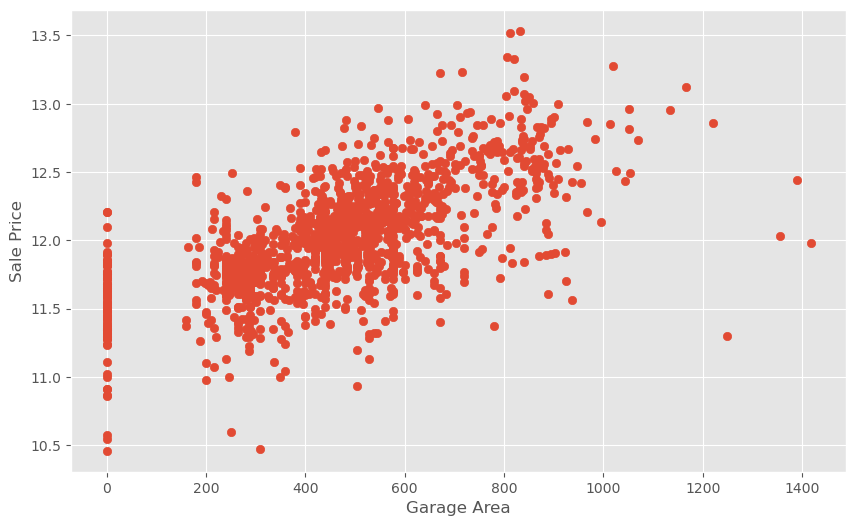

In [20]:
plt.scatter(x=train["GarageArea"], y=target)
plt.ylabel("Sale Price")
plt.xlabel("Garage Area")
plt.show()

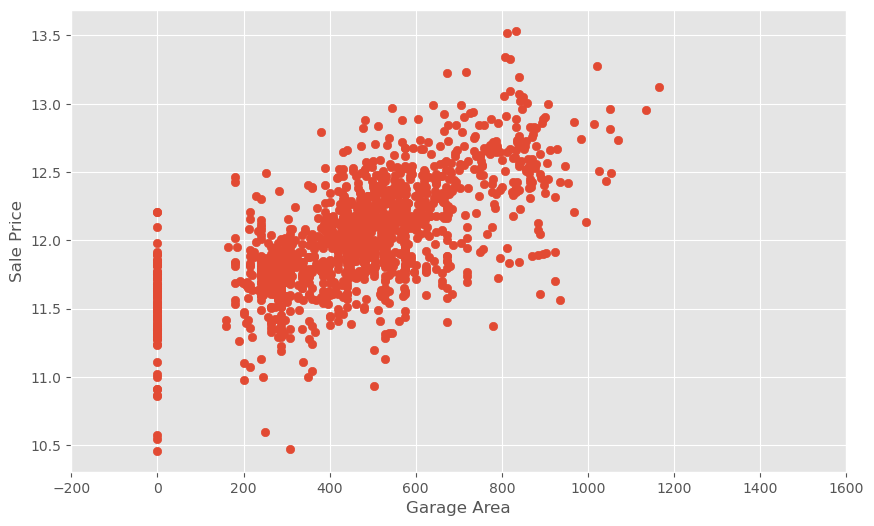

In [21]:
train=train[train["GarageArea"]<1200]
plt.scatter(x=train["GarageArea"], y=np.log(train.SalePrice))
plt.xlim(-200,1600)
plt.ylabel("Sale Price")
plt.xlabel("Garage Area")
plt.show()

In [22]:
nulls=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns=["Null Count"]
nulls.index.name="Features"
print(nulls)

              Null Count
Features                
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
MasVnrType           871
FireplaceQu          689
LotFrontage          258
GarageYrBlt           81
GarageCond            81
GarageType            81
GarageFinish          81
GarageQual            81
BsmtFinType2          38
BsmtExposure          38
BsmtQual              37
BsmtCond              37
BsmtFinType1          37
MasVnrArea             8
Electrical             1
Id                     0
Functional             0
Fireplaces             0
KitchenQual            0
KitchenAbvGr           0
BedroomAbvGr           0


In [25]:
categoricals=train.select_dtypes(exclude=[np.number])
print(categoricals.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1455         1455       1455  ...       1374         1374   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1378          225       1257  ...        867          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1374       1374       1455      6    281          53     1455   
unique          5          5          3      3      4           4        9   
top            TA         TA      

In [27]:
print("Origigi ")
print(train.Street.value_counts(), "\n")

Origigi 
Street
Pave    1450
Grvl       5
Name: count, dtype: int64 



In [38]:
train['enc_street']=pd.get_dummies(train.Street, drop_first=True)
test['enc_street']=pd.get_dummies(test.Street, drop_first=True)
print("Encoded \n")
print(train.enc_street.value_counts())

Encoded 

enc_street
True     1450
False       5
Name: count, dtype: int64


C:\Users\Ognjen\AppData\Local\Temp\ipykernel_8620\1427494088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['enc_street']=pd.get_dummies(train.Street, drop_first=True)


C:\Users\Ognjen\AppData\Local\Temp\ipykernel_8620\3149728043.py:1: FutureWarning: The provided callable <function median at 0x00000242F159A340> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  condition_pivot=train.pivot_table(index="SaleCondition", values="SalePrice", aggfunc=np.median)


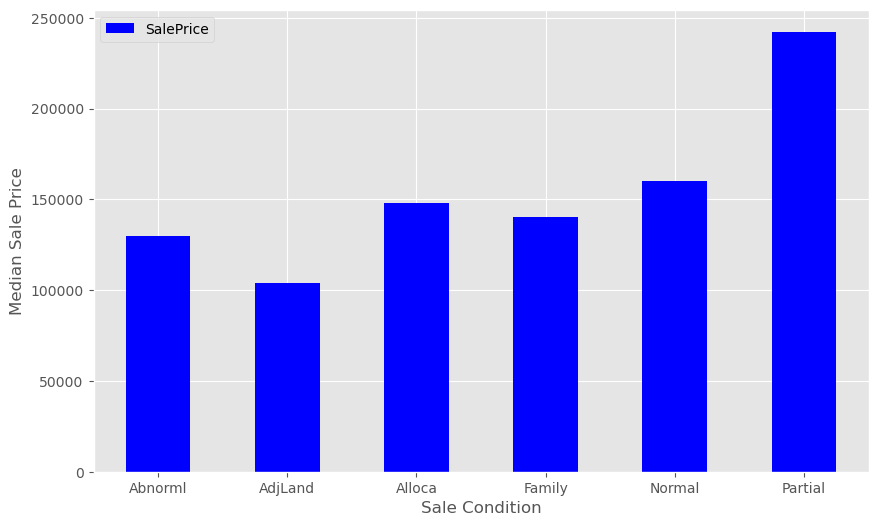

In [37]:
condition_pivot=train.pivot_table(index="SaleCondition", values="SalePrice", aggfunc=np.median)
condition_pivot.plot(kind="bar", color="blue")
plt.xlabel("Sale Condition")
plt.ylabel("Median Sale Price")
plt.xticks(rotation=0)
plt.show()

In [39]:
def encode(x): return 1 if x=="Partial" else 0
train["enc_condition"]=train.SaleCondition.apply(encode)
test["enc_condition"]=test.SaleCondition.apply(encode)


C:\Users\Ognjen\AppData\Local\Temp\ipykernel_8620\2545236662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["enc_condition"]=train.SaleCondition.apply(encode)


C:\Users\Ognjen\AppData\Local\Temp\ipykernel_8620\3916570236.py:1: FutureWarning: The provided callable <function median at 0x00000242F159A340> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  condition_pivot=train.pivot_table(index="enc_condition", values="SalePrice", aggfunc=np.median)


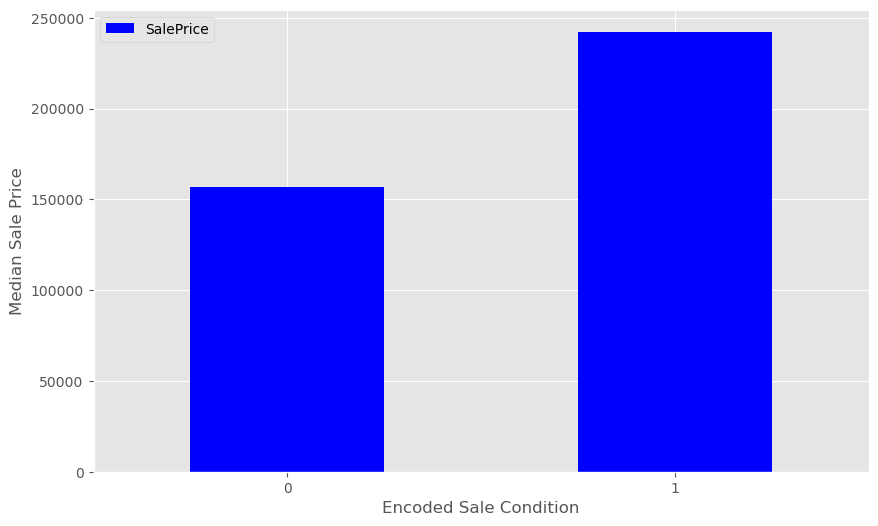

In [44]:
condition_pivot=train.pivot_table(index="enc_condition", values="SalePrice", aggfunc=np.median)
condition_pivot.plot(kind="bar", color="blue")
plt.xlabel("Encoded Sale Condition")
plt.ylabel("Median Sale Price")
plt.xticks(rotation=0)
plt.show()

In [45]:
data=train.select_dtypes(include=[np.number]).interpolate().dropna()

In [46]:
print(sum(data.isnull().sum()!=0))

0


In [48]:
y=np.log(train.SalePrice)
X=data.drop(["SalePrice", "Id"], axis=1)

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn import linear_model

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [56]:
lr=linear_model.LinearRegression()

In [57]:
model=lr.fit(X_train, y_train)

In [59]:
print("R**2: ", model.score(X_test, y_test))

R**2:  0.8883509099666328
